In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import datasets
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt


model = load_model('cifar-model.h5')

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_labels_one_hot = to_categorical(training_labels, num_classes=10)
testing_labels_one_hot = to_categorical(testing_labels, num_classes=10)
print('x_train shape => ' , training_images.shape)
print('x_test shape => ' , testing_images.shape)
print('training_labels shape => ' , training_labels.shape)
print('testing_labels shape => ' , testing_labels.shape)
training_images, testing_images = training_images / 255, testing_images / 255

x_train shape =>  (50000, 32, 32, 3)
x_test shape =>  (10000, 32, 32, 3)
training_labels shape =>  (50000, 1)
testing_labels shape =>  (10000, 1)


In [3]:
index_to_display = 1  
image_to_display = testing_images[index_to_display]
label_to_display = testing_labels[index_to_display]

In [7]:
image_to_display

array([[[[0.00361399, 0.00361399, 0.00361399],
         [0.00355248, 0.00355248, 0.00355248],
         [0.00356786, 0.00356786, 0.00356786],
         ...,
         [0.00358324, 0.00358324, 0.00358324],
         [0.00358324, 0.00358324, 0.00358324],
         [0.00356786, 0.00356786, 0.00356786]],

        [[0.00366013, 0.00366013, 0.00366013],
         [0.00361399, 0.00361399, 0.00361399],
         [0.00361399, 0.00361399, 0.00361399],
         ...,
         [0.00362937, 0.00362937, 0.00362937],
         [0.00362937, 0.00362937, 0.00362937],
         [0.00361399, 0.00361399, 0.00361399]],

        [[0.00364475, 0.00364475, 0.00364475],
         [0.00359862, 0.00359862, 0.00359862],
         [0.00359862, 0.00359862, 0.00359862],
         ...,
         [0.00361399, 0.00361399, 0.00361399],
         [0.00361399, 0.00361399, 0.00361399],
         [0.00359862, 0.00359862, 0.00359862]],

        ...,

        [[0.00133795, 0.00152249, 0.0013687 ],
         [0.00066128, 0.00078431, 0.00056901]

In [4]:
image_to_display = image_to_display / 255.0  

image_to_display = np.reshape(image_to_display, (1, 32, 32, 3)) 

In [5]:
predictions = model.predict(image_to_display)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 447ms/step


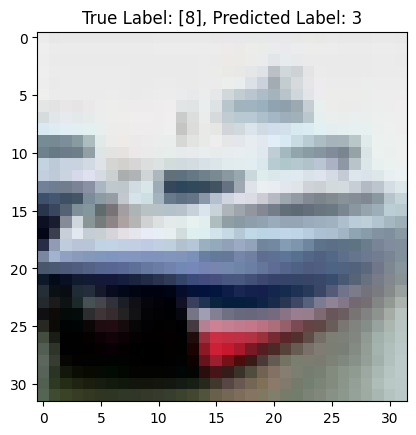

In [6]:
plt.imshow(testing_images[index_to_display])
plt.title(f"True Label: {label_to_display}, Predicted Label: {predicted_label}")
plt.show()